In [99]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import make_regression
import seaborn as sns

In [100]:
data=pd.read_csv('mushrooms.csv')
data=data[:2000]

In [101]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,3,1,2,1,4,0,0,1,2,...,2,3,3,0,0,0,2,1,2,4
1,0,3,1,4,1,0,0,0,0,2,...,2,3,3,0,0,0,2,2,1,1
2,0,0,1,3,1,2,0,0,0,3,...,2,3,3,0,0,0,2,2,1,2
3,1,3,2,3,1,4,0,0,1,3,...,2,3,3,0,0,0,2,1,2,4
4,0,3,1,1,0,3,0,1,0,2,...,2,3,3,0,0,0,0,2,0,1


In [102]:
split = int(0.9 * data.shape[0])

xtrain = data.values[:split,1:]
xtest = data.values[split:,1:]

ytrain = data.values[:split,0]
ytest = data.values[split:,0]

print (xtrain.shape, xtest.shape)
print (ytrain.shape, ytest.shape)

(1800, 22) (200, 22)
(1800,) (200,)


In [103]:
def hypo(x,w,b):
    h=((x*w).sum()+b)
    return sigmoid(h)


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-1.0 * z))


def err(y_true,x,w,b):
    er=0
    
    m=x.shape[0]
    
    for i in range(m):
        if y_true[i]==1:
            er-=np.log2(hypo(x[i],w,b))
        else:
            er-=np.log2(1.0-hypo(x[i],w,b))
    er/=m
    return er


def grad(y_true,x,w,b):
    gw=0
    gb=0
    
    m=x.shape[0]
    
    for i in range(m):
        gw-=(y_true[i]-hypo(x[i],w,b))*(x[i])
        gb-=(y_true[i]-hypo(x[i],w,b))
    gw/=m
    gb/=m
    return [gw,gb]


def grades(y_true,x,w,b,lrate=0.001):
    er=err(y_true,x,w,b)
    
    [gw,gb]=grad(y_true,x,w,b)
    
    w-=lrate*gw
    b-=lrate*gb
    
    return er,w,b

def predict(x,w,b):
    x=hypo(x,w,b)
    
    if x>=0.5:
        return 1
    else:
        return 0

def gacc(y_tst, x_tst ,w,B):
    y_pred = []
    for ix in range(y_tst.shape[0]):
        x=predict(x_tst[ix], w, B)
        y_pred.append(x)
        #if(x==y_tst[ix]):
        #    print (True)
        #else:
        #    print(False)
    y_pred = np.asarray(y_pred)
    return float((y_pred==y_tst).sum())/y_tst.shape[0]

In [109]:
loss = []
acc = []
W = np.random.random((xtrain.shape[1],))
b = np.random.random()

#print (W)
print (b)

0.3666243684463335


In [110]:
for ix in range(30):
    l, W, b = grades(ytrain, xtrain, W, b, lrate=0.1)
    acc.append(gacc(ytest, xtest, W, b))
    loss.append(l)

In [111]:
print(loss)

print(acc)

[23.095920923789908, 16.383446689830556, 9.6723182648243267, 3.1253120225568765, 0.5703039031119248, 0.54996445520664794, 0.53998201512908273, 0.53166223231371268, 0.52370190740620393, 0.51598288278345528, 0.50848971263254661, 0.50121415407793757, 0.49414862230069106, 0.48728575047584255, 0.48061836159416577, 0.47413947255541644, 0.46784230043883157, 0.46172026755813395, 0.45576700487376021, 0.44997635382840151, 0.44434236676868555, 0.43885930612926033, 0.43352164254944631, 0.42832405208104901, 0.42326141263289074, 0.41832879978418752, 0.41352148208559103, 0.40883491595389926, 0.40426474025421721, 0.39980677065196257]
[0.085, 0.085, 0.085, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.91, 0.91, 0.905, 0.91, 0.91, 0.91, 0.91, 0.91]


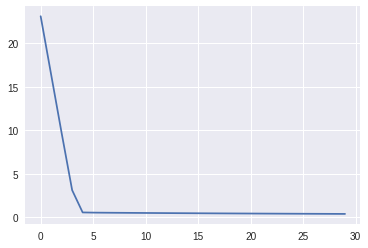

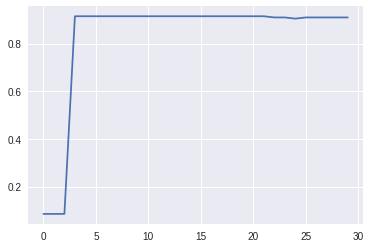

In [112]:
plt.figure(0)
plt.plot(loss)

plt.figure(1)
plt.plot(acc)